## Objective:
Determine whether a game is considered successful

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [5]:
# Set style
# sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Todo 1: Load dataset
df = pd.read_csv('steam.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns:\n{df.columns.tolist()}")

# print(f"\nData types:")
# print(df.dtypes)


Dataset shape: (27075, 18)

Columns:
['appid', 'name', 'release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners', 'price']


In [6]:
print(f"\nFirst few rows:")
df.head()


First few rows:


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [7]:
print(f"\nMissing values:")
print(df.isnull().sum())


Missing values:
appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64


In [8]:
# Todo 2: Data Cleaning - Handle missing values

# hint: dropna()


df = df.dropna()
print(f"\nMissing values after cleaning:")
print(df.isnull().sum())

print(f"Dataset shape: {df.shape}")


Missing values after cleaning:
appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64
Dataset shape: (27061, 18)


In [9]:
# Calculate key metrics
df['total_ratings'] = df['positive_ratings'] + df['negative_ratings']
df['positive_ratio'] = df['positive_ratings'] / (df['total_ratings'] + 1)

# Filter games with enough ratings (100+)
df_clean = df[df['total_ratings'] >= 100].copy()
print(f"\nGames with 100+ ratings: {len(df_clean)} ({len(df_clean)/len(df)*100:.1f}%)")


df.head()



Games with 100+ ratings: 8758 (32.4%)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,total_ratings,positive_ratio
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,127873,0.973881
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,3951,0.839575
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,3814,0.895413
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,1540,0.826087
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,5538,0.947825


In [10]:
# Define success: 80%+ positive ratings (positive ratio of 0.8)
df_clean['success'] = (df_clean['positive_ratio'] >= 0.8).astype(int)

print("\n=== Target Variable ===")
print(df_clean['success'].value_counts())
print(f"\nSuccess rate: {df_clean['success'].mean():.2%}")




=== Target Variable ===
success
0    4509
1    4249
Name: count, dtype: int64

Success rate: 48.52%


In [11]:
# 1. Price features
df_clean['is_free'] = (df_clean['price'] == 0).astype(int)

# Mapping price tiers
'''
0 : Budget
1 : Mid
2 : Standard
3 : Premium
4 : Expensive
'''

df_clean['price_tier'] = pd.cut(df_clean['price'], 
                                 bins=[-0.01, 0, 5, 15, 30, 1000],
                                 labels=[0, 1, 2, 3, 4]).astype(int)



# 2. Engagement features
df_clean['has_achievements'] = (df_clean['achievements'] > 0).astype(int)
df_clean['high_playtime'] = (df_clean['average_playtime'] > df_clean['average_playtime'].median()).astype(int)
df_clean['engagement_score'] = np.log10(df_clean['total_ratings'] + 1)


# 3. Genre encoding (top 15 genres)
top_genres = ['Action', 'Indie', 'Adventure', 'Casual', 'Strategy', 'Massively Multiplayer', 'Violent','Nudity',
              'Simulation', 'RPG', 'Sports', 'Racing', 'Early Access', 'Free to Play', 'Gore']

for genre in top_genres:
    df_clean[f'genre_{genre}'] = df_clean['genres'].str.contains(
        genre, case=False, na=False
    ).astype(int)

df_clean['genre_count'] = df_clean[[f'genre_{g}' for g in top_genres]].sum(axis=1)

# 4. Category encoding (important categories)
key_categories = ['Single-player', 'Multi-player', 'Co-op', 
                  'Steam Achievements', 'Steam Cloud']

for category in key_categories:
    cat_name = category.replace('-', '_').replace(' ', '_').lower()
    df_clean[f'cat_{cat_name}'] = df_clean['categories'].str.contains(
        category, case=False, na=False
    ).astype(int)

# 5. Owners feature (convert range to numeric)
def parse_owners(owner_str):
    if pd.isna(owner_str):
        return 0
    try:
        # Take midpoint of range (e.g., "20000-50000" -> 35000)
        parts = owner_str.split('-')
        return (int(parts[0]) + int(parts[1])) / 2
    except:
        return 0

df_clean['owners_estimate'] = df_clean['owners'].apply(parse_owners)
df_clean['owners_log'] = np.log10(df_clean['owners_estimate'] + 1)

print("\n=== New Features Created ===")
new_features = ['is_free', 'price_tier', 'has_achievements', 'high_playtime', 
                # 'platform_count', 
                'genre_count', 'owners_log']
print(df_clean[new_features].head(10))

# Genre distribution
print("\n=== Genre Distribution ===")
genre_dist = df_clean[[f'genre_{g}' for g in top_genres]].sum().sort_values(ascending=False)
print(genre_dist)


=== New Features Created ===
   is_free  price_tier  has_achievements  high_playtime  genre_count  \
0        0           2                 0              1            1   
1        0           1                 0              1            1   
2        0           1                 0              1            1   
3        0           1                 0              1            1   
4        0           1                 0              1            1   
5        0           1                 0              1            1   
6        0           2                 0              1            1   
7        0           2                 0              1            1   
8        0           1                 0              1            1   
9        0           2                 1              1            1   

   owners_log  
0    7.176091  
1    6.875061  
2    6.875061  
3    6.875061  
4    6.875061  
5    6.875061  
6    6.875061  
7    7.176091  
8    6.875061  
9    7.176091  



In [12]:
df_clean.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,genre_Free to Play,genre_Gore,genre_count,cat_single_player,cat_multi_player,cat_co_op,cat_steam_achievements,cat_steam_cloud,owners_estimate,owners_log
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,1,0,1,0,0,0,15000000.0,7.176091
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,1,0,1,0,0,0,7500000.0,6.875061
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,0,0,1,0,1,0,0,0,7500000.0,6.875061
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,1,0,1,0,0,0,7500000.0,6.875061
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,0,1,1,1,0,0,0,7500000.0,6.875061


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                              f1_score, roc_auc_score, classification_report,
                              confusion_matrix, roc_curve)

In [14]:
# Select features

# 1-inf
numeric_features = [
    'price', 'achievements', 
    'average_playtime', 'median_playtime',
    'price_tier', 'genre_count',
    'engagement_score', 'owners_log'
]


# 0 or 1 values
binary_features = (
    ['is_free', 'has_achievements', 'high_playtime', 
      'english'] +
    [f'genre_{g}' for g in top_genres] +
    [f'cat_{cat.replace("-", "_").replace(" ", "_").lower()}' for cat in key_categories]
)

all_features = numeric_features + binary_features

# Create feature matrix
X = df_clean[all_features].fillna(0)
y = df_clean['success']

print(f"Feature matrix: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

Feature matrix: (8758, 32)
Target distribution:
success
0    4509
1    4249
Name: count, dtype: int64


Link: https://www.geeksforgeeks.org/machine-learning/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/

In [15]:

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Success rate in train: {y_train.mean():.2%}")
print(f"Success rate in test: {y_test.mean():.2%}")

# Scale features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])


Train set: 7006 samples
Test set: 1752 samples
Success rate in train: 48.52%
Success rate in test: 48.52%


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Dictionary to store results
results = {}


Link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [20]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)

dummy_test = pd.DataFrame({
    # Numeric features
    'price': [9.99],
    'achievements': [15],
    'average_playtime': [300],
    'median_playtime': [150],
    'price_tier': [1],
    'genre_count': [2],
    'engagement_score': [3.5],
    'owners_log': [6.5],
    
    # Binary features
    'is_free': [0],
    'has_achievements': [1],
    'high_playtime': [1],
    'english':  [1],
    
    # Genre features
    'genre_Action': [1],
    'genre_Indie': [1],
    'genre_Adventure': [0],
    'genre_Casual': [0],
    'genre_Strategy': [0],
    'genre_Massively Multiplayer': [0],
    'genre_Violent': [0],
    'genre_Nudity': [0],
    'genre_Simulation': [0],
    'genre_RPG': [0],
    'genre_Sports': [0],
    'genre_Racing': [0],
    'genre_Early Access': [0],
    'genre_Free to Play': [0],
    'genre_Gore': [0],
    
    # Category features
    'cat_single_player': [1],
    'cat_multi_player': [1],
    'cat_co_op': [0],
    'cat_steam_achievements': [1],
    'cat_steam_cloud': [0]
})


dummy_test_scaled = dummy_test. copy()
dummy_test_scaled[numeric_features] = scaler.transform(dummy_test[numeric_features])


y_pred_test = lr.predict(dummy_test_scaled)

# Make prediction
y_pred_test = lr.predict(dummy_test_scaled)
y_proba_test = lr.predict_proba(dummy_test_scaled)

print(f"Prediction:  {'Success' if y_pred_test[0] == 1 else 'Not Success'}")
print(f"Probability: {y_proba_test[0][1]:.2%} chance of success")

Prediction:  Not Success
Probability: 26.28% chance of success


In [21]:
# 1. LOGISTIC REGRESSION
print("\n[1/4] Training Logistic Regression...")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

results['Logistic Regression'] = {
    'model': lr,
    'predictions': y_pred_lr,
    'probabilities': y_proba_lr,
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'precision': precision_score(y_test, y_pred_lr),
    'recall': recall_score(y_test, y_pred_lr),
    'f1': f1_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, y_proba_lr)
}
print(f"Accuracy: {results['Logistic Regression']['accuracy']:.4f}")


[1/4] Training Logistic Regression...
Accuracy: 0.6747


In [22]:
# 2. DECISION TREE
print("\n[2/4] Training Decision Tree...")
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=50, 
                             min_samples_leaf=20, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

results['Decision Tree'] = {
    'model': dt,
    'predictions': y_pred_dt,
    'probabilities': y_proba_dt,
    'accuracy': accuracy_score(y_test, y_pred_dt),
    'precision': precision_score(y_test, y_pred_dt),
    'recall': recall_score(y_test, y_pred_dt),
    'f1': f1_score(y_test, y_pred_dt),
    'roc_auc': roc_auc_score(y_test, y_proba_dt)
}
print(f"Accuracy: {results['Decision Tree']['accuracy']:.4f}")


[2/4] Training Decision Tree...
Accuracy: 0.6627


In [23]:
# 3. RANDOM FOREST
print("\n[3/4] Training Random Forest...")
rf = RandomForestClassifier(n_estimators=100, max_depth=15, 
                             min_samples_split=20, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

results['Random Forest'] = {
    'model': rf,
    'predictions': y_pred_rf,
    'probabilities': y_proba_rf,
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1': f1_score(y_test, y_pred_rf),
    'roc_auc': roc_auc_score(y_test, y_proba_rf)
}
print(f"Accuracy: {results['Random Forest']['accuracy']:.4f}")


[3/4] Training Random Forest...
Accuracy: 0.6895


In [24]:
# 4. GRADIENT BOOSTING
print("\n[4/4] Training Gradient Boosting...")
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, 
                                 max_depth=5, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]

results['Gradient Boosting'] = {
    'model': gb,
    'predictions': y_pred_gb,
    'probabilities': y_proba_gb,
    'accuracy': accuracy_score(y_test, y_pred_gb),
    'precision': precision_score(y_test, y_pred_gb),
    'recall': recall_score(y_test, y_pred_gb),
    'f1': f1_score(y_test, y_pred_gb),
    'roc_auc': roc_auc_score(y_test, y_proba_gb)
}
print(f"Accuracy: {results['Gradient Boosting']['accuracy']:.4f}")


[4/4] Training Gradient Boosting...
Accuracy: 0.6895



MODEL COMPARISON
              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression    0.6747     0.6687  0.6529    0.6607   0.7436
      Decision Tree    0.6627     0.6497  0.6612    0.6554   0.7249
      Random Forest    0.6895     0.6866  0.6624    0.6743   0.7645
  Gradient Boosting    0.6895     0.6852  0.6659    0.6754   0.7652


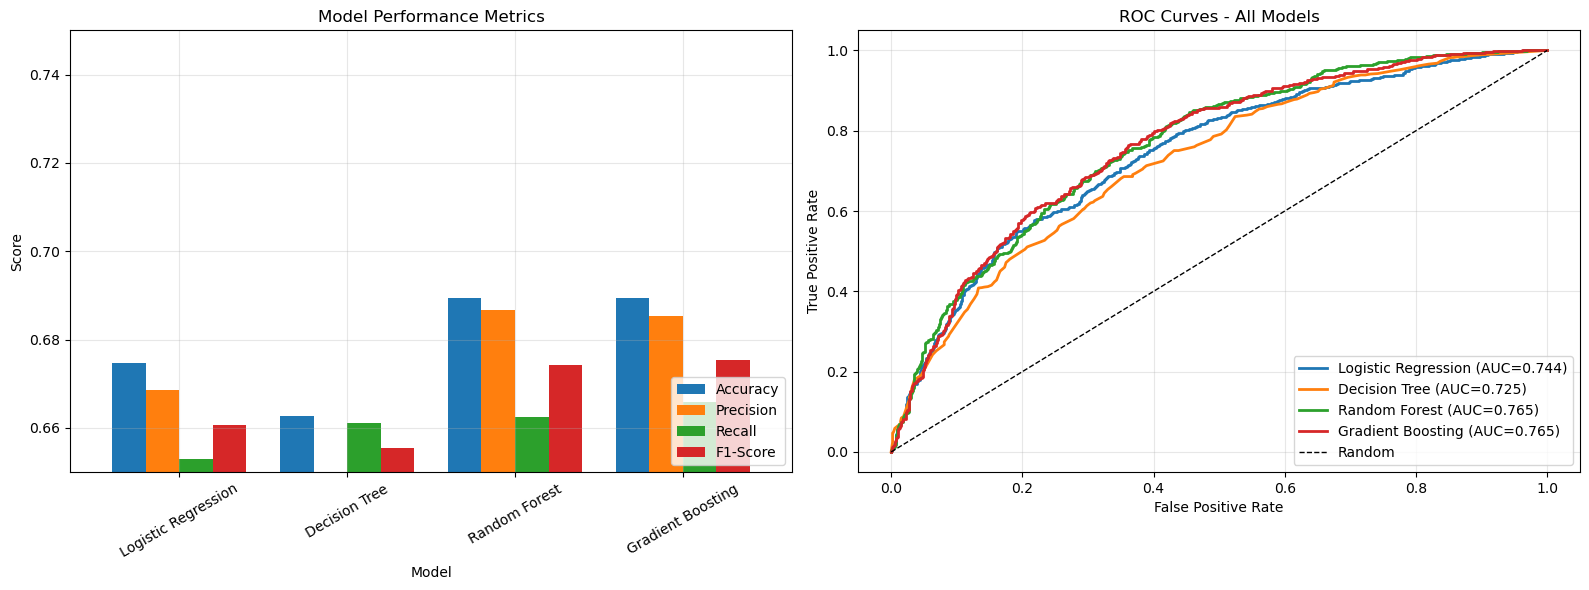


Best Model: Gradient Boosting
ROC-AUC: 0.7652


In [25]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1-Score': [results[m]['f1'] for m in results],
    'ROC-AUC': [results[m]['roc_auc'] for m in results]
})

print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)
print(comparison_df.round(4).to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
comparison_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(
    kind='bar', ax=axes[0], width=0.8, rot=30,
)
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Metrics')
axes[0].legend(loc='lower right')
axes[0].set_ylim([0.65, 0.75])
axes[0].grid(True, alpha=0.3)

# ROC Curves
for model_name in results:
    fpr, tpr, _ = roc_curve(y_test, results[model_name]['probabilities'])
    auc = results[model_name]['roc_auc']
    axes[1].plot(fpr, tpr, linewidth=2, label=f'{model_name} (AUC={auc:.3f})')

axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curves - All Models')
axes[1].legend(loc='lower right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find best model
best_model_name = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'Model']
best_model = results[best_model_name]['model']
print(f"\nBest Model: {best_model_name}")
print(f"ROC-AUC: {results[best_model_name]['roc_auc']:.4f}")

In [26]:

best_predictions = results[best_model_name]['predictions']
best_probabilities = results[best_model_name]['probabilities']

# Feature importance (if applicable)
if best_model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
    feature_importance = pd.DataFrame({
        'feature': all_features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False).head(15)
    
    print("\n=== Top 15 Important Features ===")
    print(feature_importance.to_string(index=False))


=== Top 15 Important Features ===
                    feature  importance
           engagement_score    0.231484
                 owners_log    0.117215
                      price    0.104935
               achievements    0.071687
genre_Massively Multiplayer    0.055521
            median_playtime    0.050924
           average_playtime    0.049125
           cat_multi_player    0.043711
            cat_steam_cloud    0.042015
           genre_Simulation    0.035696
                genre_count    0.028471
             genre_Strategy    0.021342
                genre_Indie    0.020858
               genre_Casual    0.020025
            genre_Adventure    0.014443
